## <font color=green>Day-12</font>

- Our topic of discussion is <font color=green size="4">**Regression**</font>
- Dataset That we would be using : dogs-vs-cats
    - Please download the dataset from this [Link](https://www.kaggle.com/competitions/dogs-vs-cats/data#:~:text=get_app-,Download,-All)

- Contents :
    1. Learning Contents about **Logistic Regression with a Neural Network Mindset**
    1. Importing Headers
    2. Define Constants
    3. Loading Data
    4. Helpful Functions
    5. Initializing Weights and Parameters
    6. Cost Function and Gradients Calculation
    7. Optimizing w,b to get least Cost
    8. Data preparation
    9. Model Training
    10. Model Validation
    8. Conclusion


### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>

### Learning

- The learning materials I chose to learn about Neural Networks is from this Course in Coursera ([Link](https://in.coursera.org/learn/neural-networks-deep-learning/))
- I am attaching the PDF's of the course for your learning - [Link](https://community.deeplearning.ai/t/dls-course-1-lecture-notes/11862)
- Credits to Deeplearning.ai for making such wonderful course and achievements accessible to everyone

### 1. Headers

In [1]:
# Computation Libraries
import numpy as np
import pandas as pd
import scipy
import copy

import os

# Image Handling libraries
from PIL import Image

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Modelling Libraries
from sklearn.model_selection import train_test_split

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

/Users/saikarna/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Define Constants

In [2]:
# defaults for training
IMG_HEIGHT = 64
IMG_WIDTH  = 64

### 3. Loading Dataset

In [3]:
## We store the data directly in a verctorized format 
dataset_path = "./Dataset/dogs-vs-cats/"
train_path = dataset_path+"train/"
test_path = dataset_path+"test1/"

def load_dataset(train_path):
    X, Y =[],[]
    for filename in os.listdir(train_path):
        if(filename[-3:]=="jpg"):
            file_path = train_path+filename
            image= np.array(Image.open(file_path))
            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
            image = image.astype('float32')
            image /= 255.  
            X.append(image)
            Y.append(1 if filename[0]=="d" else 0)
    X,Y = np.array(X), np.array(Y)
    return X, Y

In [4]:
X , Y = load_dataset(train_path)

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
print("Number of data points in X : ",X.shape)
print("Number of data points in Y : ",Y.shape)

## Number of Cats and Dogs
pd.Series(Y).value_counts()

Number of data points in X :  (25000, 64, 64, 3)
Number of data points in Y :  (25000,)


1    12500
0    12500
dtype: int64

### 4. Helpful Functions

In [7]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

### 5. Initializing the Weights and Parameters

In [8]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1),dtype="float")
    b = 0.0
    return w, b

### 6. Cost Function and Gradients Calculation

In [9]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))
    dw = (1/m)*(np.dot(X,(A-Y).T))
    db = (1./m)*np.sum(A-Y)
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### 7. Optimizing w,b to get least Cost 

In [10]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    
    costs = []
    present_cost = 0
    prev_cost = 0
    prev_prev_cost = 0
    prev_prev_prev_cost = 0
    
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w-np.dot(learning_rate,dw)
        b = b-np.dot(learning_rate,db)
            
#         if(i>3 and i%20==0):
#             if(triangle(present_cost,prev_cost,prev_prev_cost, prev_prev_prev_cost)):
#                 learning_rate -= 0.0005
#             else:
#                 learning_rate += 0.0007
#         print(cost , learning_rate)

        if i % 5 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
        
        prev_prev_prev_cost = prev_prev_cost
        prev_prev_cost = prev_cost
        prev_cost = present_cost
        present_cost = cost
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### 8. Data preparation

In [11]:
print("Number of data points in X : ",X.shape)
print("Number of data points in Y : ",Y.shape)


X_train, X_test, Y_train ,Y_test = train_test_split(X,Y,test_size = 0.33, random_state = 33)
print("X-train Shape : ",X_train.shape, "Y-train Shape : ",Y_train.shape)
print("X-test Shape : ",X_test.shape, "Y-test Shape : ",Y_test.shape)

Number of data points in X :  (25000, 64, 64, 3)
Number of data points in Y :  (25000,)
X-train Shape :  (16750, 64, 64, 3) Y-train Shape :  (16750,)
X-test Shape :  (8250, 64, 64, 3) Y-test Shape :  (8250,)


In [12]:
X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
Y_train_flatten = Y_train.reshape(Y_train.shape[0],-1).T

X_test_flatten = X_test.reshape(X_test.shape[0],-1).T
Y_test_flatten = Y_test.reshape(Y_test.shape[0],-1).T

print("X-train Shape : ",X_train_flatten.shape, "Y-train Shape : ",Y_train_flatten.shape)
print("X-test Shape : ",X_test_flatten.shape, "Y-test Shape : ",Y_test_flatten.shape)

X-train Shape :  (12288, 16750) Y-train Shape :  (1, 16750)
X-test Shape :  (12288, 8250) Y-test Shape :  (1, 8250)


### 9. Model Training

In [13]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i]> 0.5 else 0
    
    return Y_prediction

In [14]:
def train_model(X_train, Y_train, num_iterations=100, learning_rate=0.5, print_cost=False):
    
    w,b = initialize_with_zeros(dim=X_train.shape[0])
    
#     print(w.shape)
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = params["w"]
    b = params["b"]
    Y_prediction_train = predict(w,b,X_train)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [15]:
model = train_model(X_train_flatten,Y_train_flatten, num_iterations=100, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 5: 1.559786
Cost after iteration 10: 1.518473
Cost after iteration 15: 1.621053
Cost after iteration 20: 1.514014
Cost after iteration 25: 1.620075
Cost after iteration 30: 1.512061
Cost after iteration 35: 1.618917
Cost after iteration 40: 1.510213
Cost after iteration 45: 1.617671
Cost after iteration 50: 1.508458
Cost after iteration 55: 1.616355
Cost after iteration 60: 1.506789
Cost after iteration 65: 1.614982
Cost after iteration 70: 1.505199
Cost after iteration 75: 1.613563
Cost after iteration 80: 1.503683
Cost after iteration 85: 1.612110
Cost after iteration 90: 1.502236
Cost after iteration 95: 1.610630
train accuracy: 50.208955223880594 %


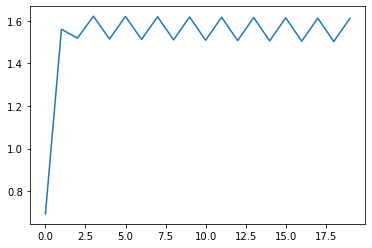

In [16]:
costs = np.squeeze(model['costs'])
plt.plot(costs)

### 10. Validating Dataset

In [17]:
Y_pred = predict(model["w"],model["b"],X_test_flatten)

In [18]:
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_pred.reshape(Y_pred.shape[1],-1),Y_test)))
print(classification_report(Y_pred.reshape(Y_pred.shape[1],-1),Y_test))

Testing-set accuracy score: 0.4955
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.66      8248
         1.0       0.00      0.00      0.00         2

    accuracy                           0.50      8250
   macro avg       0.50      0.25      0.33      8250
weighted avg       1.00      0.50      0.66      8250

